In [ ]:
# I want to clean the data in the Data/all_dvd_data_with_genomic_info folder, so that it will only include missense variants and path/benign variants
import os
import pandas as pd

# Get the list of all files in the folder
files = os.listdir("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\all_dvd_data_with_genomic_info\\")

# For each file, read the data and filter it
for file in files:
    # Read the data
    data = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\all_dvd_data_with_genomic_info\\" + file)
    
    # Filter the data
    data = data[data['vep_consequence'] == 'missense_variant']
    data = data[data['final_pathogenicity'].isin(['Pathogenic', 'Benign'])]
    
    # Save the data
    data.to_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\all_dvd_data_with_genomic_info\\" + file, index=False)

In [31]:
# print one of the files to see if the filtering worked
data = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\all_dvd_data_with_genomic_info\\" + files[0])
print(data)

        id        variation       pos     vep_feature  \
0  2358199  20:25282896:G>C  25282896  NM_001042472.3   
1  2358234  20:25282967:C>T  25282967  NM_001042472.3   
2  2359156  20:25289122:G>C  25289122  NM_001042472.3   
3  2360122  20:25295575:G>A  25295575  NM_001042472.3   
4  2360406  20:25297700:C>G  25297700  NM_001042472.3   
5  2360777  20:25300850:C>T  25300850  NM_001042472.3   
6  2363262  20:25319977:C>T  25319977  NM_001042472.3   

                 vep_hgvs_c   vep_hgvs_p  vep_protein_pos vep_exon vep_intron  \
0  NM_001042472.3:c.1116C>G  p.His372Gln              372    12/13         \N   
1  NM_001042472.3:c.1045G>A  p.Ala349Thr              349    12/13         \N   
2   NM_001042472.3:c.758C>G  p.Thr253Arg              253     8/13         \N   
3   NM_001042472.3:c.605C>T  p.Thr202Ile              202     6/13         \N   
4   NM_001042472.3:c.557G>C  p.Arg186Pro              186     5/13         \N   
5   NM_001042472.3:c.527G>A  p.Gly176Glu              176

In [32]:
# If there are no rows in the data, I want to remove the file from the folder and print it to screen.
for file in files:
    data = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\all_dvd_data_with_genomic_info\\" + file)
    # If there is only the header in the data, remove the file
    if data.shape[0] == 0:
        os.remove("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\all_dvd_data_with_genomic_info\\" + file)
        print(file)

In [33]:
# For each file, I want to add a column that will include the variant in the format of "Amino_acid:Position:Amino_acid", use the functions from the utils file
from general_tools import convert_hgvs_protein_to_variant

# Update files list after removing files
files = os.listdir("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\all_dvd_data_with_genomic_info\\")

# For each file, read the data and add the column
for file in files:
    # Read the data
    data = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\all_dvd_data_with_genomic_info\\" + file)
    
    # Cut the string to only include the amino acid change in all the rows
    data['vep_hgvs_p'] = data['vep_hgvs_p'].apply(lambda x: x.split(":")[-1])
    
    # Add the column
    data['variant'] = data.apply(lambda row: convert_hgvs_protein_to_variant(row['vep_hgvs_p']), axis=1)
    
    # Save the data
    data.to_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\all_dvd_data_with_genomic_info\\" + file, index=False)

In [34]:
# print one of the files to see if the column was added
data = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\all_dvd_data_with_genomic_info\\" + files[0])
print(data)

        id        variation       pos     vep_feature  \
0  2358199  20:25282896:G>C  25282896  NM_001042472.3   
1  2358234  20:25282967:C>T  25282967  NM_001042472.3   
2  2359156  20:25289122:G>C  25289122  NM_001042472.3   
3  2360122  20:25295575:G>A  25295575  NM_001042472.3   
4  2360406  20:25297700:C>G  25297700  NM_001042472.3   
5  2360777  20:25300850:C>T  25300850  NM_001042472.3   
6  2363262  20:25319977:C>T  25319977  NM_001042472.3   

                 vep_hgvs_c   vep_hgvs_p  vep_protein_pos vep_exon vep_intron  \
0  NM_001042472.3:c.1116C>G  p.His372Gln              372    12/13         \N   
1  NM_001042472.3:c.1045G>A  p.Ala349Thr              349    12/13         \N   
2   NM_001042472.3:c.758C>G  p.Thr253Arg              253     8/13         \N   
3   NM_001042472.3:c.605C>T  p.Thr202Ile              202     6/13         \N   
4   NM_001042472.3:c.557G>C  p.Arg186Pro              186     5/13         \N   
5   NM_001042472.3:c.527G>A  p.Gly176Glu              176

In [ ]:
# Create one csv file with all the data from all the files in the folder. With columns: gene, variant, pathogenicity, chromosome, position, ref, alt.
# First, read all the files and concatenate them
data = pd.concat([pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\all_dvd_data_with_genomic_info\\" + file) for file in files])
# Now remove the columns that are not needed
# Change the variation column to include only the value until the :
data['chromosome'] = data['variation'].apply(lambda x: x.split(":")[0])
data['ref'] = data['vep_hgvs_c'].str[-3]
data['alt'] = data['vep_hgvs_c'].str[-1]
data = data[['gene', 'variant', 'final_pathogenicity', 'chromosome', 'pos', 'ref', 'alt']]
# Change the name of final_pathogenicity to pathogenicity
data = data.rename(columns={'final_pathogenicity': 'pathogenicity'})
# Save the data
data.to_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\benchmarking\\predictions_of_other_tools_for_all_dvd_variants.csv", index=False)

In [37]:
# Add uniprot_id to the data
from data_retrievel_and_feature_extraction import uniprot_info as uni

# Read the data
data = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\benchmarking\\predictions_of_other_tools_for_all_dvd_variants.csv")

# Create dictionary of genes
genes_to_uniprot = {}
for gene in data['gene'].unique():
    genes_to_uniprot[gene] = uni.get_uniprot_id(gene)

# Add the uniprot_id column
data['uniprot_id'] = data['gene'].apply(lambda x: genes_to_uniprot[x])

# Save the data
data.to_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\benchmarking\\predictions_of_other_tools_for_all_dvd_variants.csv", index=False)


In [1]:
import pandas as pd

# create a csv file with only the variants that are new.

# Load the full data
full_data = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\benchmarking\\predictions_of_other_tools_for_all_dvd_variants.csv")
older_data = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\data_for_all_dvd.csv")

# Remove the variants that are in the older data, from the full data. Check for the same gene and variant
new_data = full_data[~full_data.apply(lambda row: older_data[(older_data['gene'] == row['gene']) & (older_data['variant'] == row['variant'])].shape[0] > 0, axis=1)]


new_data

,gene,variant,pathogenicity,chromosome,pos,ref,alt,uniprot_id
0,ABHD12,H372Q,Pathogenic,20,25282896,C,G,Q8N2K0
2,ABHD12,T253R,Pathogenic,20,25289122,C,G,Q8N2K0
3,ABHD12,T202I,Pathogenic,20,25295575,C,T,Q8N2K0
4,ABHD12,R186P,Pathogenic,20,25297700,G,C,Q8N2K0
5,ABHD12,G176E,Pathogenic,20,25300850,G,A,Q8N2K0
...,...,...,...,...,...,...,...,...
7272,USH2A,F78C,Pathogenic,1,216595446,T,G,O75445
7273,USH2A,F78V,Pathogenic,1,216595447,T,G,O75445
7274,USH2A,S69I,Pathogenic,1,216595473,G,T,O75445
7275,USH2A,R63Q,Pathogenic,1,216595491,G,A,O75445


In [2]:
# Save the new data
new_data.to_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\Data\\new_dvd_variants_24_4_2024.csv", index=False)

In [40]:
# read csv file with predictions of my tool.
protein_type = "globular"
type = "proteins"

my_tool_predictions = pd.read_csv(f"C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\{protein_type}_{type}\\predictions_vs_real_{protein_type}_{type}.csv")
my_tool_predictions

,gene,variant,prediction,reality,prediction_score
0,POLR1D,L111P,1,1,0.988281
1,POLR1D,T50I,1,1,0.657763
2,POLR1D,L55V,1,1,0.777872
3,POLR1D,G99S,1,1,0.860174
4,POLR1D,C68W,1,1,0.989620
...,...,...,...,...,...
2306,SERPINB6,V346I,0,0,0.226315
2307,SERPINB6,G153S,1,0,0.584133
2308,SERPINB6,M90V,1,0,0.622667
2309,BDP1,V275I,0,0,0.164097


In [41]:
# Read csv file with the predictions of REVEL
other_tools_predictions = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\benchmarking\\predictions_of_other_tools_for_all_dvd_variants_with_revel_and_am.csv")
other_tools_predictions

,gene,variant,pathogenicity,chromosome,pos,ref,alt,uniprot_id,revel_score,am_pathogenicity,am_class
0,ABHD12,H372Q,Pathogenic,20,25282896,C,G,Q8N2K0,0.747,0.9992,pathogenic
1,ABHD12,A349T,Benign,20,25282967,G,A,Q8N2K0,0.071,0.0842,benign
2,ABHD12,T253R,Pathogenic,20,25289122,C,G,Q8N2K0,0.423,0.9962,pathogenic
3,ABHD12,T202I,Pathogenic,20,25295575,C,T,Q8N2K0,0.729,0.8880,pathogenic
4,ABHD12,R186P,Pathogenic,20,25297700,G,C,Q8N2K0,0.829,0.9986,pathogenic
...,...,...,...,...,...,...,...,...,...,...,...
7488,WHRN,R223H,Benign,9,117241002,G,A,Q9P202,0.173,0.1726,benign
7489,WHRN,R223C,Benign,9,117241003,C,T,Q9P202,0.207,0.2118,benign
7490,WHRN,E137Q,Benign,9,117266673,G,C,Q9P202,0.148,0.1253,benign
7491,WHRN,S101F,Pathogenic,9,117266780,C,T,Q9P202,0.427,0.9754,pathogenic


In [42]:
# Join the data of my tool and REVEL, by the gene and variant columns. If there is a row in REVEL that is not in my tool, ignore it.
joined_data = my_tool_predictions.merge(other_tools_predictions, on=['gene', 'variant'], how='inner')
joined_data

,gene,variant,prediction,reality,prediction_score,pathogenicity,chromosome,pos,ref,alt,uniprot_id,revel_score,am_pathogenicity,am_class
0,POLR1D,L111P,1,1,0.988281,Pathogenic,13,28197317,T,C,P0DPB6,0.898,0.9446,pathogenic
1,POLR1D,T50I,1,1,0.657763,Pathogenic,13,28197134,C,T,P0DPB6,0.942,0.9808,pathogenic
2,POLR1D,L55V,1,1,0.777872,Pathogenic,13,28197148,C,G,P0DPB6,0.885,0.3601,ambiguous
3,POLR1D,G99S,1,1,0.860174,Pathogenic,13,28197280,G,A,P0DPB6,0.786,0.7039,pathogenic
4,POLR1D,C68W,1,1,0.989620,Pathogenic,13,28197189,T,G,P0DPB6,0.837,0.9932,pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,SERPINB6,V346I,0,0,0.226315,Benign,6,2948627,G,A,P35237,0.212,0.0976,benign
2205,SERPINB6,G153S,1,0,0.584133,Benign,6,2953394,G,A,P35237,0.177,0.1128,benign
2206,SERPINB6,M90V,1,0,0.622667,Benign,6,2955802,A,G,P35237,0.186,0.1233,benign
2207,BDP1,V275I,0,0,0.164097,Benign,5,70763218,G,A,Q99952,0.127,0.0960,benign


In [43]:
# remove the rows with nan values in revel_score
joined_data_revel = joined_data[~joined_data['revel_score'].isna()]
joined_data_am = joined_data[~joined_data['am_pathogenicity'].isna()]

In [44]:
# Compare revel score to prediction score using brier score loss
from sklearn.metrics import brier_score_loss
import numpy as np

y_true = joined_data_revel['reality']
y_pred = joined_data_revel['revel_score']
brier_score_loss(y_true, y_pred)
print(f"Brier score loss for REVEL, {protein_type} {type}: {brier_score_loss(y_true, y_pred)}")

y_pred = joined_data_revel['prediction_score']
brier_score_loss(y_true, y_pred)
print(f"Brier score loss for my tool on revel variants, {protein_type} {type}: {brier_score_loss(y_true, y_pred)}")

# AlphaMissense

y_true = joined_data_am['reality']
y_pred = joined_data_am['am_pathogenicity']
brier_score_loss(y_true, y_pred)
print(f"Brier score loss for AlphaMissense, {protein_type} {type}: {brier_score_loss(y_true, y_pred)}")

y_pred = joined_data_am['prediction_score']
brier_score_loss(y_true, y_pred)
print(f"Brier score loss for my tool on am variants, {protein_type} {type}: {brier_score_loss(y_true, y_pred)}")

Brier score loss for REVEL, globular proteins: 0.10242290648567119
Brier score loss for my tool on revel variants, globular proteins: 0.15532062905251837
Brier score loss for AlphaMissense, globular proteins: 0.12499630415119965
Brier score loss for my tool on am variants, globular proteins: 0.14831799819104047


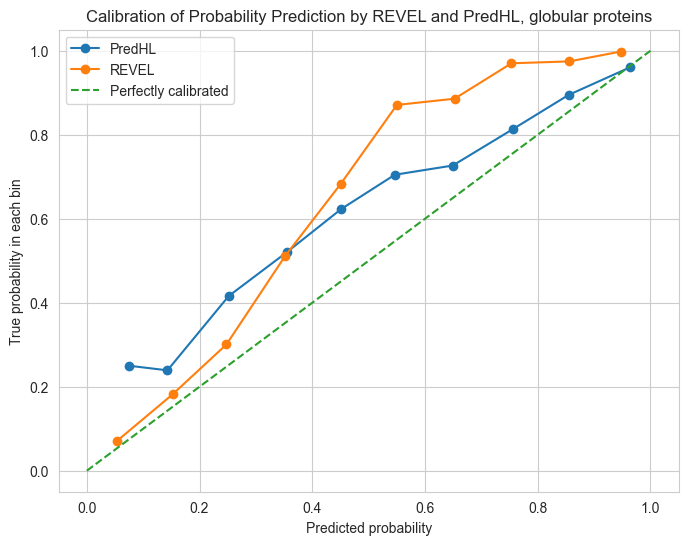

In [45]:
# Create a probability calibration curve for the revel predictions
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
n_bins = 10
plt.figure(figsize=(8, 6))

# For my predictions
prob_true_1, prob_pred_1 = calibration_curve(joined_data_revel['reality'], joined_data_revel['prediction_score'], n_bins=n_bins)
plt.plot(prob_pred_1, prob_true_1, marker='o', label='PredHL')

# For REVEL predictions
prob_true_2, prob_pred_2 = calibration_curve(joined_data_revel['reality'], joined_data_revel['revel_score'], n_bins=n_bins)
plt.plot(prob_pred_2, prob_true_2, marker='o', label='REVEL')

plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')

plt.xlabel('Predicted probability')
plt.ylabel('True probability in each bin')
plt.title(f'Calibration of Probability Prediction by REVEL and PredHL, {protein_type} {type}')
plt.legend()
plt.show()

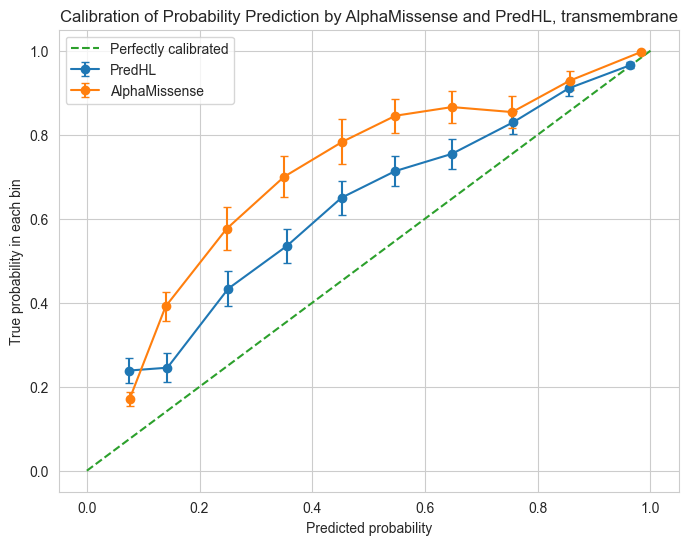

In [88]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np

# Number of bins
n_bins = 10

# Create a plot
plt.figure(figsize=(8, 6))

# For PredHL predictions
# Get the calibration curve
prob_true_1, prob_pred_1 = calibration_curve(joined_data_am['reality'], joined_data_am['prediction_score'], n_bins=n_bins)

# Calculate bin counts for PredHL
bin_counts_1 = np.histogram(joined_data_am['prediction_score'], bins=n_bins)[0]

# Calculate standard deviation and standard error for PredHL
std_true_1 = np.sqrt(prob_true_1 * (1 - prob_true_1) / bin_counts_1)
sem_true_1 = std_true_1

# Plot the PredHL calibration curve with error bars
plt.errorbar(prob_pred_1, prob_true_1, yerr=sem_true_1, marker='o', label='PredHL', capsize=3)

# For AlphaMissense predictions
# Get the calibration curve
prob_true_2, prob_pred_2 = calibration_curve(joined_data_am['reality'], joined_data_am['am_pathogenicity'], n_bins=n_bins)

# Calculate bin counts for AlphaMissense
bin_counts_2 = np.histogram(joined_data_am['am_pathogenicity'], bins=n_bins)[0]

# Calculate standard deviation and standard error for AlphaMissense
std_true_2 = np.sqrt(prob_true_2 * (1 - prob_true_2) / bin_counts_2)
sem_true_2 = std_true_2

# Plot the AlphaMissense calibration curve with error bars
plt.errorbar(prob_pred_2, prob_true_2, yerr=sem_true_2, marker='o', label='AlphaMissense', capsize=3)

# Plot the perfectly calibrated line
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')

# Add labels and title
plt.xlabel('Predicted probability')
plt.ylabel('True probability in each bin')
plt.title(f'Calibration of Probability Prediction by AlphaMissense and PredHL, {protein_type}')

# Add a legend
plt.legend()

# Show the plot
plt.show()

MCC for REVEL, globular: 0.7258816803713694
MCC for PredHL, globular: 0.49251779646970456
Precision for REVEL, globular: 0.9623875715453802
Precision for PredHL, globular: 0.8701504354711006
MCC for AlphaMissense, globular: 0.6438677790845455
MCC for PredHL, globular: 0.49958632298972216
Precision for AlphaMissense, globular: 0.9624521072796934
Precision for PredHL, globular: 0.8846685082872928


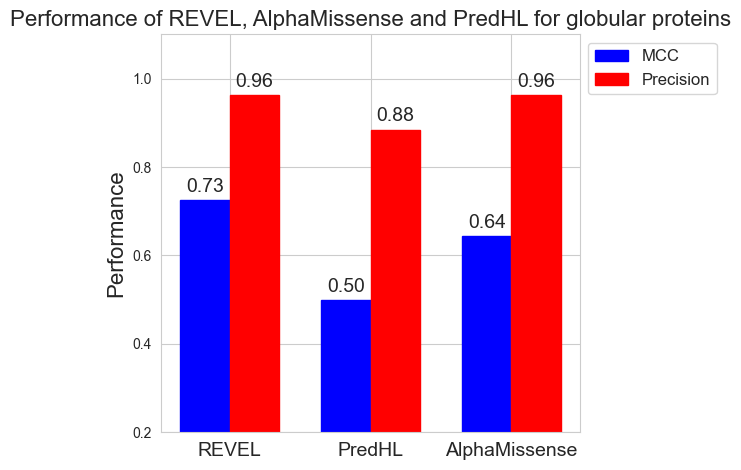

In [47]:
# Calculate MCC for the predictions of REVEL
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score

mcc_revel = matthews_corrcoef(joined_data_revel['reality'], joined_data_revel['revel_score'] > 0.5)
mcc_predhl = matthews_corrcoef(joined_data_revel['reality'], joined_data_revel['prediction_score'] > 0.5)
print(f"MCC for REVEL, {protein_type}: {mcc_revel}")
print(f"MCC for PredHL, {protein_type}: {mcc_predhl}")

precision_revel = precision_score(joined_data_revel['reality'], joined_data_revel['revel_score'] > 0.5)
precision_predhl = precision_score(joined_data_revel['reality'], joined_data_revel['prediction_score'] > 0.5)
print(f"Precision for REVEL, {protein_type}: {precision_revel}")
print(f"Precision for PredHL, {protein_type}: {precision_predhl}")

# Calculate MCC for the predictions of AlphaMissense
mcc_am = matthews_corrcoef(joined_data_am['reality'], joined_data_am['am_pathogenicity'] > 0.5)
mcc_predhl = matthews_corrcoef(joined_data_am['reality'], joined_data_am['prediction_score'] > 0.5)
print(f"MCC for AlphaMissense, {protein_type}: {mcc_am}")
print(f"MCC for PredHL, {protein_type}: {mcc_predhl}")

precision_am = precision_score(joined_data_am['reality'], joined_data_am['am_pathogenicity'] > 0.5)
precision_predhl = precision_score(joined_data_am['reality'], joined_data_am['prediction_score'] > 0.5)
print(f"Precision for AlphaMissense, {protein_type}: {precision_am}")
print(f"Precision for PredHL, {protein_type}: {precision_predhl}")

# Plot the MCC and precision (in the same bar plot)
import matplotlib.pyplot as plt

mcc = [mcc_revel, mcc_predhl, mcc_am]
precision = [precision_revel, precision_predhl, precision_am]
labels = ['REVEL', 'PredHL', 'AlphaMissense']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mcc, width, label='MCC')
rects2 = ax.bar(x + width/2, precision, width, label='Precision')

ax.set_ylabel('Performance', fontsize=16)
ax.set_ylim(0.2, 1.1)
ax.set_title(f'Performance of REVEL, AlphaMissense and PredHL for {protein_type} {type}', fontsize=16)
# set colors for the bars
color1 = 'blue'
color2 = 'red'
rects1[0].set_color(color1)
rects2[0].set_color(color2)
rects1[1].set_color(color1)
rects2[1].set_color(color2)
rects1[2].set_color(color1)
rects2[2].set_color(color2)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# Add the values on top of the bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

add_values(rects1)
add_values(rects2)

fig.tight_layout()

plt.show()


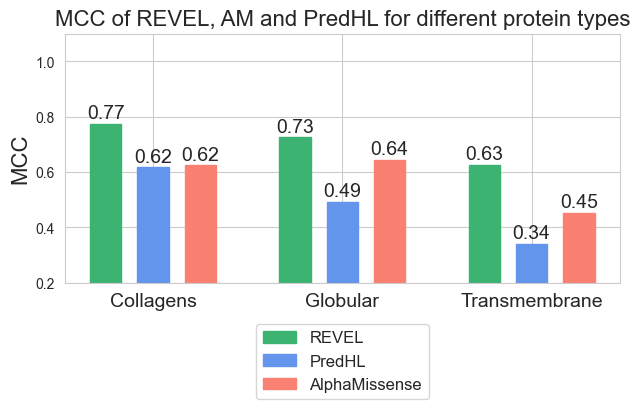

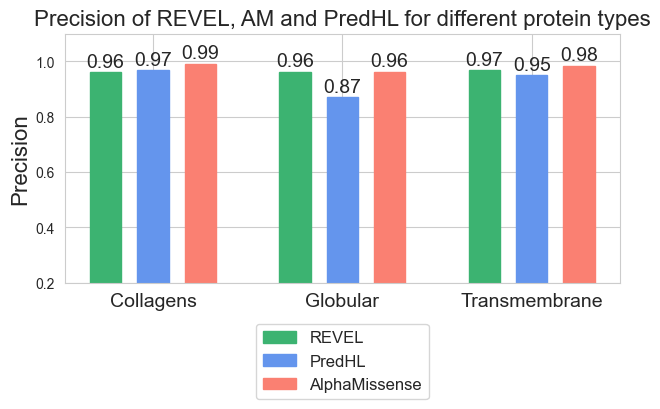

In [83]:
# Creating a graph that shows the MCC for all the 3 protein types:
# Read the data
protein_types = ['collagens', 'globular', 'transmembrane']
types = ['proteins', 'proteins', 'residues']

def get_mcc_and_precision(protein_type, type):
    my_tool_predictions = pd.read_csv(
        f"C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\{protein_type}_{type}\\predictions_vs_real_{protein_type}_{type}.csv")
    # Read csv file with the predictions of REVEL
    other_tools_predictions = pd.read_csv(
        "C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\benchmarking\\predictions_of_other_tools_for_all_dvd_variants_with_revel_and_am.csv")
    # Join the data of my tool and REVEL, by the gene and variant columns. If there is a row in REVEL that is not in my tool, ignore it.
    joined_data = my_tool_predictions.merge(other_tools_predictions, on=['gene', 'variant'], how='inner')
    # remove the rows with nan values in revel_score
    joined_data_revel = joined_data[~joined_data['revel_score'].isna()]
    joined_data_am = joined_data[~joined_data['am_pathogenicity'].isna()]
    # Calculate MCC for the predictions of REVEL
    mcc_revel = matthews_corrcoef(joined_data_revel['reality'], joined_data_revel['revel_score'] > 0.5)
    mcc_predhl = matthews_corrcoef(joined_data_revel['reality'], joined_data_revel['prediction_score'] > 0.5)
    mcc_am = matthews_corrcoef(joined_data_am['reality'], joined_data_am['am_pathogenicity'] > 0.5)
    precision_revel = precision_score(joined_data_revel['reality'], joined_data_revel['revel_score'] > 0.5)
    precision_predhl = precision_score(joined_data_revel['reality'], joined_data_revel['prediction_score'] > 0.5)
    precision_am = precision_score(joined_data_am['reality'], joined_data_am['am_pathogenicity'] > 0.5)
    return mcc_revel, mcc_predhl, mcc_am, precision_revel, precision_predhl, precision_am

mcc_revels = []
mcc_predhls = []
mcc_ams = []
precision_revels = []
precision_predhls = []
precision_ams = []

for protein_type, type in zip(protein_types, types):
    mcc_revel, mcc_predhl, mcc_am, precision_revel, precision_predhl, precision_am = get_mcc_and_precision(protein_type, type)
    mcc_revels.append(mcc_revel)
    mcc_predhls.append(mcc_predhl)
    mcc_ams.append(mcc_am)
    precision_revels.append(precision_revel)
    precision_predhls.append(precision_predhl)
    precision_ams.append(precision_am)

# Add the values on top of the bars


def plot_mcc_and_precision(mcc_or_precision, mcc_revels, mcc_predhls, mcc_ams):
    labels = ['Collagens', 'Globular', 'Transmembrane']
    
    x = np.arange(len(labels))
    width = 0.5
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, mcc_revels, width/3, label='REVEL')
    rects2 = ax.bar(x, mcc_predhls, width/3, label='PredHL')
    rects3 = ax.bar(x + width/2, mcc_ams, width/3, label='AlphaMissense')
    
    ax.set_ylabel(mcc_or_precision, fontsize=16)
    ax.set_ylim(0.2, 1.1)
    ax.set_title(f'{mcc_or_precision} of REVEL, AM and PredHL for different protein types', fontsize=16)
    # set colors for the bars
    color1 = 'mediumseagreen'
    color2 = 'cornflowerblue'
    color3 = 'salmon'
    rects1[0].set_color(color1)
    rects2[0].set_color(color2)
    rects3[0].set_color(color3)
    rects1[1].set_color(color1)
    rects2[1].set_color(color2)
    rects3[1].set_color(color3)
    rects1[2].set_color(color1)
    rects2[2].set_color(color2)
    rects3[2].set_color(color3)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=14)
    ax.legend(fontsize=12, loc='lower center', bbox_to_anchor=(0.5, -0.5))
    
    def add_values(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 1),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=14)
    add_values(rects1)
    add_values(rects2)
    add_values(rects3)
    
    fig.tight_layout()
    
    plt.show()
    
plot_mcc_and_precision("MCC", mcc_revels, mcc_predhls, mcc_ams)
plot_mcc_and_precision("Precision", precision_revels, precision_predhls, precision_ams)




In [9]:
# Read the txt file and convert to a csv file
import pandas as pd
# file path is "C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\uniprot_and_genes.txt"
# Read the file
# Read the txt file and convert to a csv file
import pandas as pd

# file path is "C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\uniprot_and_genes.txt"
# Read the file
with open("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\uniprot_and_genes.txt", "r") as file:
    lines = file.readlines()

# Create a dictionary with the data
data = {}
key = None
for line in lines:
    line = line.strip()
    # For each line, the first value is the key, and the second is the value, and they are separated by a comma
    key = line.split(",")[0]
    value = line.split(",")[1]
    data[key] = value

In [10]:
print(data)

{'POLR1D': 'P0DPB6', 'NDP': 'Q00604', 'USH1G': 'Q495M9', 'COL11A1': 'P12107', 'SLC44A4': 'Q53GD3', 'OSBPL2': 'Q9H1P3', 'KCNE1': 'P15382', 'ESRRB': 'O95718', 'FGF3': 'P11487', 'TBX1': 'O43435', 'SMPX': 'Q9UHP9', 'PAX1': 'P15863', 'ACTB': 'P60709', 'COCH': 'O43405', 'WHRN': 'Q9P202', 'CISD2': 'Q8N5K1', 'TMEM126A': 'Q9H061', 'SIX2': 'Q9NPC8', 'REST': 'Q13127', 'NF2': 'P35240', 'ATP6V1B1': 'P15313', 'MET': 'P08581', 'SEMA3E': 'O15041', 'TJP2': 'Q9UDY2', 'AMMECR1': 'Q9Y4X0', 'KCNJ10': 'P78508', 'FOXI1': 'Q12951', 'MAN2B1': 'O00754', 'LHFPL5': 'Q8TAF8', 'MYO6': 'Q9UM54', 'POLR1B': 'Q9H9Y6', 'KCNQ1': 'P51787', 'FGFR1': 'P11362', 'MANBA': 'O00462', 'ERAL1': 'O75616', 'GIPC3': 'Q8TF64', 'PEX1': 'O43933', 'ILDR1': 'Q86SU0', 'HARS2': 'P49590', 'MYO7A': 'Q13402', 'CHSY1': 'Q86X52', 'CCDC50': 'Q8IVM0', 'DNMT1': 'P26358', 'POU3F4': 'P49335', 'ESPN': 'B1AK53', 'BTD': 'P43251', 'PRPS1': 'P60891', 'POU4F3': 'Q15319', 'BCS1L': 'Q9Y276', 'NLRP3': 'Q96P20', 'CIB2': 'O75838', 'COL4A3': 'Q01955', 'SOX10': '

In [35]:
# Create graphs that compare the predictions of my tool to the predictions of AlphaMissense, for each protein type and type
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import brier_score_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.calibration import calibration_curve

# Read the data
protein_type = "collagens"
type = "proteins"
my_tool_predictions = pd.read_csv(f"C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\{protein_type}_{type}\\predictions_vs_real_{protein_type}_{type}.csv")
other_tools_predictions = pd.read_csv(f"C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\benchmarking\\predictions_of_other_tools_for_all_dvd_variants_with_revel_and_am.csv")

# Join the data
joined_data = my_tool_predictions.merge(other_tools_predictions, on=['gene', 'variant'], how='inner')
joined_data = joined_data[~joined_data['am_pathogenicity'].isna()]
joined_data

,gene,variant,prediction,reality,prediction_score,pathogenicity,chromosome,pos,ref,alt,uniprot_id,revel_score,am_pathogenicity,am_class
0,COL11A1,G1249V,1,1,0.965916,Pathogenic,1,103385883,G,T,P12107,0.909,0.9505,pathogenic
1,COL11A1,G1516V,1,1,0.983618,Pathogenic,1,103354286,G,T,P12107,0.998,0.9748,pathogenic
2,COL11A1,R1733C,1,1,0.982503,Pathogenic,1,103345316,C,T,P12107,0.809,0.7065,pathogenic
3,COL11A1,G1800C,1,1,0.958905,Pathogenic,1,103343598,G,T,P12107,0.941,0.9094,pathogenic
4,COL11A1,R1076C,1,1,0.856221,Pathogenic,1,103412455,C,T,P12107,0.947,0.8094,pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,COL9A2,P661T,0,0,0.323628,Benign,1,40766943,C,A,Q14055,0.729,0.1468,benign
978,COL9A2,G30R,1,0,0.972021,Benign,1,40781324,G,A,Q14055,0.883,0.7010,pathogenic
979,COL9A2,L335V,0,0,0.032607,Benign,1,40773123,C,G,Q14055,0.241,0.0859,benign
980,COL9A2,R32Q,0,0,0.404838,Benign,1,40781317,G,A,Q14055,0.166,0.0769,benign


In [36]:
# Calculate the brier score loss for the predictions of AlphaMissense
y_true = joined_data['reality']
y_pred = joined_data['am_pathogenicity']
brier_score_loss(y_true, y_pred)

# Present the brier score loss for the predictions of AlphaMissense
print(f"Brier score loss for AlphaMissense, {protein_type} {type}: {brier_score_loss(y_true, y_pred)}")

# Calculate the brier score loss for the predictions of my tool
y_true = joined_data['reality']
y_pred = joined_data['prediction_score']
brier_score_loss(y_true, y_pred)

# Present the brier score loss for the predictions of my tool
print(f"Brier score loss for my tool, {protein_type} {type}: {brier_score_loss(y_true, y_pred)}")

Brier score loss for AlphaMissense, collagens proteins: 0.09140531856415478
Brier score loss for my tool, collagens proteins: 0.08130145578294716


In [37]:
# Calculate the MCC for the predictions of AlphaMissense
mcc_am = matthews_corrcoef(joined_data['reality'], joined_data['am_pathogenicity'] > 0.5)
mcc_predhl = matthews_corrcoef(joined_data['reality'], joined_data['prediction_score'] > 0.5)
print(f"MCC for AlphaMissense, {protein_type} {type}: {mcc_am}")
print(f"MCC for PredHL, {protein_type} {type}: {mcc_predhl}")


MCC for AlphaMissense, collagens proteins: 0.6239001793970581
MCC for PredHL, collagens proteins: 0.6108331146469796


In [38]:
# Print the precision of the predictions of AlphaMissense
from sklearn.metrics import precision_score

precision_am = precision_score(joined_data['reality'], joined_data['am_pathogenicity'] > 0.5)
precision_predhl = precision_score(joined_data['reality'], joined_data['prediction_score'] > 0.5)
print(f"Precision for AlphaMissense, {protein_type} {type}: {precision_am}")
print(f"Precision for PredHL, {protein_type} {type}: {precision_predhl}")

Precision for AlphaMissense, collagens proteins: 0.9909208819714657
Precision for PredHL, collagens proteins: 0.9776951672862454


In [1]:
#Create one prediction file from the 3 prediction files of the 3 protein types:
import pandas as pd

# Read the data
collagens_proteins = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\collagens_proteins\\predictions_vs_real_collagens_proteins.csv")
globular_proteins = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\globular_proteins\\predictions_vs_real_globular_proteins.csv")
transmembrane_residues = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\transmembrane_residues\\predictions_vs_real_transmembrane_residues.csv")
    
# Concatenate the data
data = pd.concat([collagens_proteins, globular_proteins, transmembrane_residues])
data.to_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\predictions_vs_real_all_protein_types.csv", index=False)